In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [4]:
df.sample(5)

,review,sentiment
25241,Netflix should mention this short feature on t...,positive
8044,I liked the movie but it should have been long...,positive
49227,Frustrated middle-aged Deputy District Attorne...,positive
46673,"Visually, this film is interesting. Light is l...",negative
40203,This movie could have been oh so much better. ...,negative


In [5]:
df.isnull().sum()

,0
review,0
sentiment,0


In [6]:
df.duplicated().sum()

np.int64(418)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [10]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [12]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [13]:
df.shape

(49582, 2)

**EDA**

In [14]:
df['sentiment'].value_counts()

,count
sentiment,
1,24884
0,24698


In [15]:
pip install nltk

In [16]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
df['character_length'] = df['review'].apply(len)

In [18]:
df

,review,sentiment,character_length
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317
...,...,...,...
49995,I thought this movie did a down right good job...,1,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,642
49997,I am a Catholic taught in parochial elementary...,0,1280
49998,I'm going to have to disagree with the previou...,0,1234


In [19]:
df['word_length'] = df['review'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['sentence_legth'] = df['review'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.sample(5)

,review,sentiment,character_length,word_length,sentence_legth
42586,"I saw this film on television years ago, but h...",1,198,47,1
35764,This series would have been a lot better if th...,0,900,191,9
13431,Sarah Silverman is like a totally manic Zooey ...,1,836,187,16
18887,"Sure, this flick set in Eastern Europe is fill...",0,1263,276,8
13941,A beautifully photographed and paced short fil...,1,807,167,7


In [22]:
#negative
df[df['sentiment'] == 0][['character_length','word_length','sentence_legth']].describe()

,character_length,word_length,sentence_legth
count,24698.000000,24698.000000,24698.000000
mean,1294.739615,278.771682,11.033484
std,946.501793,201.449424,7.891758
min,32.000000,8.000000,1.000000
25%,706.000000,153.000000,6.000000
50%,974.000000,211.000000,9.000000
75%,1568.000000,338.000000,13.000000
max,8969.000000,1936.000000,118.000000


In [23]:
#positive
df[df['sentiment'] == 1][['character_length','word_length','sentence_legth']].describe()

,character_length,word_length,sentence_legth
count,24884.000000,24884.000000,24884.000000
mean,1326.278532,280.644229,10.451736
std,1032.597204,214.627044,7.731403
min,65.000000,11.000000,1.000000
25%,692.000000,148.000000,6.000000
50%,969.000000,207.000000,9.000000
75%,1615.250000,343.000000,13.000000
max,13704.000000,2911.000000,282.000000


In [24]:
#stopwords
from nltk.corpus import stopwords

# Get the default English stopwords and create a set
stop_words = set(stopwords.words('english'))

# Add your custom word(s) to the set
custom_words = {'br'}
stop_words.update(custom_words)

In [25]:
#punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
#lemmatize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [27]:
lemmatizer.lemmatize('going')

'going'

In [28]:
df['review'][1000]

"This movie is awful, I can't even be bothered to write a review on this garbage! All i will say it is one of the most boring films I've ever seen.<br /><br />And the acting is very bad. The boy who plays the main character really annoys me, he's got the same expression on his face through out the movie. I just want to slap him! Basically 80% of the movie is slow motion shots of skateboarders, weird music, and utter sh*t..<br /><br />Apparently I've got to write at least 10 lines of text to submit this comment, so I'll use up a few more lines by saying the lead character has got one of those faces you just want to slap!<br /><br />Meh i give up..THIS MOVIE SUCKS !!!!"

In [29]:
#logic of text preprocessing
def transform_review(review):
  review = review.lower()
  review = nltk.word_tokenize(review)

  y = []
  for i in review:
    if i.isalnum():
      y.append(i)

  review = y[:]
  y.clear()

  for i in review:
    if i not in stop_words and i not in string.punctuation:
      y.append(i)

  review = y[:]
  y.clear()

  for i in review:
    y.append(lemmatizer.lemmatize(i))

  return " ".join(y)

In [30]:
transform_review("This movie is awful, I can't even be bothered to write a review on this garbage! All i will say it is one of the most boring films I've ever seen.<br /><br />And the acting is very bad. The boy who plays the main character really annoys me, he's got the same expression on his face through out the movie. I just want to slap him! Basically 80% of the movie is slow motion shots of skateboarders, weird music, and utter sh*t..<br /><br />Apparently I've got to write at least 10 lines of text to submit this comment, so I'll use up a few more lines by saying the lead character has got one of those faces you just want to slap!<br /><br />Meh i give up..THIS MOVIE SUCKS !!!!")

'movie awful ca even bothered write review garbage say one boring film ever acting bad boy play main character really annoys got expression face movie want slap basically 80 movie slow motion shot skateboarder weird music utter sh apparently got write least 10 line text submit comment use line saying lead character got one face want slap meh give movie suck'

In [31]:
df['transformed_review'] = df['review'].apply(transform_review)
display(df.sample(5))

,review,sentiment,character_length,word_length,sentence_legth,transformed_review
25297,Some spoilers**** A Soap has some wonderful mo...,0,2294,458,18,spoiler soap wonderful moment recommend charlo...
1237,"A throwback to the ""old fashioned"" Westerns of...",1,550,117,5,throwback old fashioned western 30 40 dodge ci...
25642,The cliché of the shell-shocked soldier home f...,0,1049,190,5,cliché soldier home war given dull treatment p...
1143,This is one of the movies of Dev Anand who gav...,1,1148,231,12,one movie dev anand gave great yet distinct mo...
5530,Avida is a game of words mingling life and eag...,0,774,171,7,avida game word mingling life eagerness person...


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=400, background_color='white', min_font_size=10)

In [33]:
negative_wc = wc.generate(df[df['sentiment']==0]['transformed_review'].str.cat(sep=" "))

In [34]:
pip install matplotlib

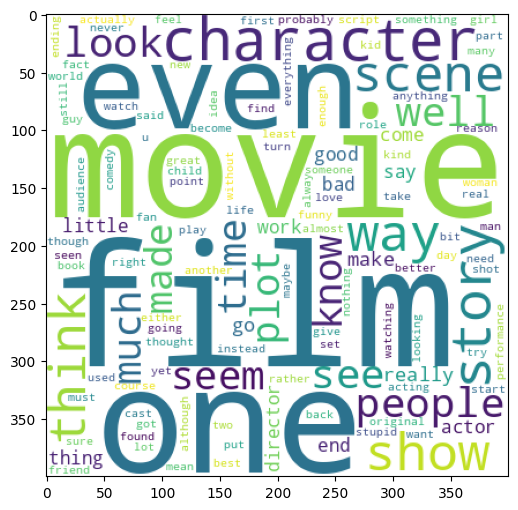

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.imshow(negative_wc)

In [36]:
positive_wc = wc.generate(df[df['sentiment']==1]['transformed_review'].str.cat(sep=" "))

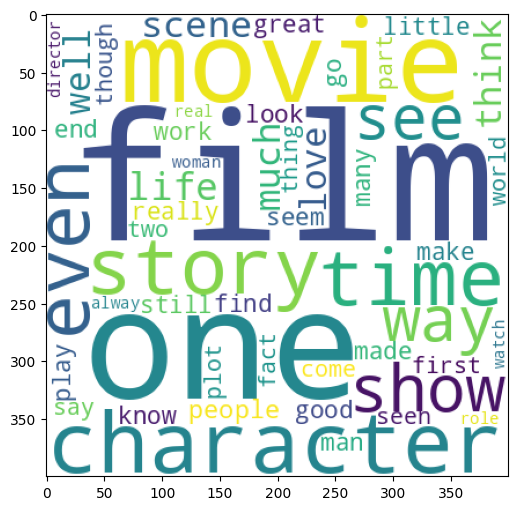

In [37]:
plt.figure(figsize=(12,6))
plt.imshow(positive_wc)

**Model Building**

In [38]:
pip install scikit-learn

In [39]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_review']).toarray()

In [ ]:
y = df['sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.navie_bayes import GaussianNB, MultinomialNB, BernouliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB
mnb = MultinomialNB
bnb = BernouliNB

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

In [ ]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

In [ ]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))